In [1]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
import numpy as np

In [2]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

image_file = get_pkg_data_filename('DATABIAS/Project1_SB.00000002.BIAS.fits')

In [3]:
fits.info(image_file)

Filename: DATABIAS\Project1_SB.00000002.BIAS.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      46   (765, 510)   int16 (rescales to uint16)   


In [4]:
image_data = fits.getdata(image_file, ext=0)

In [5]:
print(image_data.shape)

(510, 765)


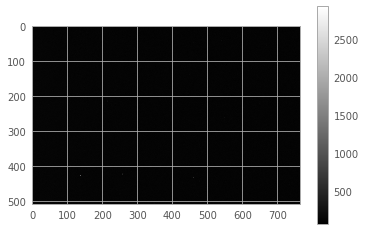

In [6]:
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()


In [7]:
import os
directory = 'DATABIAS/'

for filename in os.listdir(directory):
    if filename.endswith("/BIAS.fits"):
        f = open(filename)
        lines = f.read()
        print (lines[10])
        continue
    else:
        continue

In [8]:
print(directory)

DATABIAS/


## Begin loop to read into BIAS files  

In [17]:
cd


C:\Users\speco


In [27]:
files = os.listdir('astro136/DATA/BIAS')

print(files)

['Project1_SB.00000002.BIAS.fits', 'Project1_SB.00000003.BIAS.fits', 'Project1_SB.00000004.BIAS.fits', 'Project1_SB.00000005.BIAS.fits', 'Project1_SB.00000006.BIAS.fits', 'Project1_SB.00000007.BIAS.fits', 'Project1_SB.00000008.BIAS.fits', 'Project1_SB.00000009.BIAS.fits', 'Project1_SB.00000010.BIAS.fits', 'Project1_SB.00000011.BIAS.fits', 'Project1_SB.00000012.BIAS.fits', 'Project1_SB.00000013.BIAS.fits', 'Project1_SB.00000014.BIAS.fits', 'Project1_SB.00000015.BIAS.fits', 'Project1_SB.00000016.BIAS.fits', 'Project1_SB.00000017.BIAS.fits', 'Project1_SB.00000018.BIAS.fits', 'Project1_SB.00000019.BIAS.fits', 'Project1_SB.00000020.BIAS.fits', 'Project1_SB.00000021.BIAS.fits']


In [19]:
cd astro136/DATA/BIAS

C:\Users\speco\astro136\DATA\BIAS


In [21]:
biasdata = np.zeros((510, 765, len(files)))
for i in range(len(files)):
        hdul = fits.open(files[i])
        if not hdul[0].header['EXPTIME']:
            biasdata[:,:, i] = hdul[0].data
biasmastermean = np.mean(biasdata, axis = 2)
biasmastermedian = np.median(biasdata, axis = 2)
biasmasterstd = np.std(biasdata, axis = 2)

In [22]:
biasdata.shape
print(biasmasterstd)

[[5.60267793 6.12596931 5.61782876 ... 4.34137075 5.09803884 3.76696164]
 [7.44496474 4.98472667 7.36800516 ... 6.00749532 4.06786185 7.32444537]
 [5.9352759  6.63626401 5.58099454 ... 7.05265907 5.39073279 6.42261629]
 ...
 [6.71174344 7.88289287 5.35233594 ... 5.20960651 6.12596931 5.49795416]
 [5.80517011 5.16720427 4.97267534 ... 5.83502356 7.32444537 6.96616824]
 [4.42718872 4.10365691 4.75893896 ... 5.89491306 5.65574929 6.62268828]]


In [23]:
print(biasmastermean)

[[127.9  126.85 127.8  ... 106.95 107.1  106.1 ]
 [125.15 126.45 126.25 ... 103.9  103.45 105.45]
 [126.65 127.4  123.95 ... 104.4  107.2  103.5 ]
 ...
 [127.45 126.6  127.45 ... 106.4  104.35 105.65]
 [127.   128.   126.35 ... 108.45 105.55 109.65]
 [128.   127.4  124.45 ... 107.5  105.75 109.2 ]]


## Loop to read into Dark files

In [34]:
cd 

C:\Users\speco


In [35]:
filesDARK = os.listdir('astro136/DATA/DARK')

print(filesDARK)

['Project1_SB.00000027.DARK.fits', 'Project1_SB.00000028.DARK.fits', 'Project1_SB.00000029.DARK.fits', 'Project1_SB.00000030.DARK.fits', 'Project1_SB.00000031.DARK.fits', 'Project1_SB.00000032.DARK.fits', 'Project1_SB.00000033.DARK.fits', 'Project1_SB.00000034.DARK.fits', 'Project1_SB.00000035.DARK.fits', 'Project1_SB.00000036.DARK.fits', 'Project1_SB.00000037.DARK.fits', 'Project1_SB.00000038.DARK.fits', 'Project1_SB.00000039.DARK.fits', 'Project1_SB.00000040.DARK.fits', 'Project1_SB.00000041.DARK.fits', 'Project1_SB.00000042.DARK.fits', 'Project1_SB.00000043.DARK.fits', 'Project1_SB.00000044.DARK.fits', 'Project1_SB.00000045.DARK.fits', 'Project1_SB.00000046.DARK.fits', 'Project1_SB.00000047.DARK.fits', 'Project1_SB.00000048.DARK.fits', 'Project1_SB.00000049.DARK.fits', 'Project1_SB.00000050.DARK.fits', 'Project1_SB.00000051.DARK.fits', 'Project1_SB.00000052.DARK.fits', 'Project1_SB.00000053.DARK.fits', 'Project1_SB.00000054.DARK.fits', 'Project1_SB.00000055.DARK.fits', 'Project1_SB.

In [38]:
cd astro136/DATA/DARK

C:\Users\speco\astro136\DATA\DARK


In [39]:
darkdata = np.zeros((510, 765, len(filesDARK)))

for i in range(len(filesDARK)):
        hdul_dark = fits.open(filesDARK[i])
        if not hdul_dark[0].header['EXPTIME']:
            darkdata[:,:, i] = hdul_dark[0].data
DARKmastermean = np.mean(darkdata, axis = 2)
DARKmastermedian = np.median(darkdata, axis = 2)
DARKmasterstd = np.std(darkdata, axis = 2)

In [40]:
print(DARKmastermean)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
print(DARKmastermean.shape)

(510, 765)


## loop to read into Twilight files

In [47]:
cd

C:\Users\speco


In [48]:
filesTWI_SKY = os.listdir('astro136/DATA/TWI_SKY')

print(filesTWI_SKY)

['Project1_SB.00000089.fits', 'Project1_SB.00000090.fits', 'Project1_SB.00000091.fits', 'Project1_SB.00000092.fits', 'Project1_SB.00000093.fits', 'Project1_SB.00000094.fits', 'Project1_SB.00000095.fits', 'Project1_SB.00000096.fits', 'Project1_SB.00000097.fits', 'Project1_SB.00000098.fits', 'Project1_SB.00000099.fits', 'Project1_SB.00000100.fits', 'Project1_SB.00000101.fits', 'Project1_SB.00000102.fits', 'Project1_SB.00000103.fits', 'Project1_SB.00000104.fits', 'Project1_SB.00000105.fits', 'Project1_SB.00000106.fits', 'Project1_SB.00000107.fits', 'Project1_SB.00000108.fits', 'Project1_SB.00000109.fits', 'Project1_SB.00000110.fits', 'Project1_SB.00000111.fits', 'Project1_SB.00000112.fits', 'Project1_SB.00000113.fits', 'Project1_SB.00000114.fits', 'Project1_SB.00000115.fits', 'Project1_SB.00000116.fits', 'Project1_SB.00000117.fits', 'Project1_SB.00000118.fits', 'Project1_SB.00000119.fits', 'Project1_SB.00000120.fits', 'Project1_SB.00000121.fits', 'Project1_SB.00000122.fits', 'Project1_SB.

In [49]:
cd astro136/DATA/TWI_SKY

C:\Users\speco\astro136\DATA\TWI_SKY


In [50]:
TWILIGHTdata = np.zeros((510, 765, len(filesTWI_SKY))) # all the twilight data

for i in range(len(filesTWI_SKY)):
        hdul_twi = fits.open(filesTWI_SKY[i])
        if not hdul_twi[0].header['EXPTIME']:
            TWILIGHTdata[:,:, i] = hdul_twi[0].data
TWILIGHTmastermean = np.mean(TWILIGHTdata, axis = 2)
TWILIGHTmastermedian = np.median(TWILIGHTdata, axis = 2)
TWILIGHTmasterstd = np.std(TWILIGHTdata, axis = 2)

In [51]:
print(TWILIGHTdata.shape)

(510, 765, 67)
